# 🚀 NetworkX Workshop
## Session 2
### 🌹 Special thanks to Mr. Yahya Hematyar Tabatabaei, whose insightful NetworkX workshop inspired and guided the creation of this notebook

# 🧠 Welcome to the NetworkX Workshop!

This notebook is read-only.

👉 To work on it, click `File → Save a copy in Drive`.  
This will create your own editable version in Google Drive.

Happy coding! 🚀

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tabatabaeiphys/NetworkX/blob/main/netx2.ipynb)





This tutorial will cover:
- Clustering coefficeint
- Distance measures
- Connected graph
- Graph components
- Connectivity in directed graph
- Network robustness


## Import libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# Clustering Coefficient

The clustering coefficient of a graph is a measure of how often the neighbors of a node are connected to each other. It is a way to assess how "cliquish" a node’s neighborhood is.

## 1. Local Clustering Coefficient

The local clustering coefficient $C_i$ for a node $i$ is the proportion of the actual connections between the neighbors of $i$ to the possible connections between them. It is defined as:

$$
C_i = \frac{2 \times \text{Number of triangles connected to node } i}{k_i (k_i - 1)}
$$

Where:
- $k_i$ is the degree of node $i$, i.e., the number of neighbors of node $i$.
- A triangle refers to three nodes where each is connected to the other two.

**Note:** The denominator, $k_i (k_i - 1) / 2$, represents the number of possible connections between the neighbors of $i$, while the numerator counts the actual number of such connections.

## 2. Global Clustering Coefficient

The global clustering coefficient (also called the transitivity) is a measure of the overall tendency of a graph to form clusters or cliques. It is defined as the ratio of the number of triangles to the number of connected triples of vertices (two edges with a common node).

$$
Transitivity= \frac{3 \times \text{Number of triangles}}{\text{Number of connected triples of vertices}}
$$

Where:
- A **triangle** is a set of three nodes that are mutually connected.
- A **connected triple** consists of three nodes where at least two edges are present.

## 3. Average Clustering Coefficient

The average clustering coefficient $\langle C \rangle$ is the average of the local clustering coefficients of all the nodes in the graph. It measures the typical level of clustering within the entire network. Mathematically, it is represented as:

$$
\langle C \rangle = \frac{1}{N} \sum_{i=1}^{N} C_i
$$

Where:
- $N$ is the total number of nodes in the graph.
- $C_i$ is the local clustering coefficient for node $i$.

### Key Insights:
- **High clustering**: Nodes tend to form tightly connected groups. These clusters can often represent communities.
- **Low clustering**: Nodes are sparsely connected, and the network does not exhibit a strong community structure.

### Applications:
- **Social Networks**: Clustering can indicate the presence of closely-knit groups or communities (e.g., friend groups).
- **Biological Networks**: High clustering often occurs in protein-protein interaction networks, where functional modules are observed.
- **Technological Networks**: In networks like the internet or power grids, clustering can suggest areas with more redundancy or robustness.


Clustering Coefficients for each node:
Node A: 0.6666666666666666
Node B: 0.6666666666666666
Node C: 0.3333333333333333
Node D: 0
Node E: 0.16666666666666666
Node F: 0.3333333333333333
Node G: 0
Node H: 0
Node I: 0
Node J: 0
Node K: 1.0

Average Clustering Coefficient: 0.28787878787878785


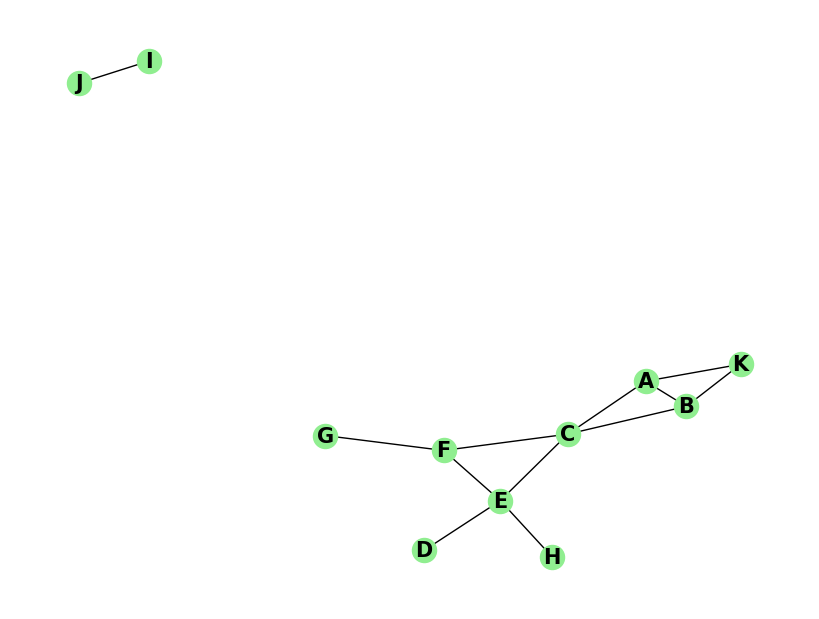

In [10]:
G = nx.Graph()

nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
edges = [("A", "B"), ("A", "C"), ("A", "K"), ("B", "C"), 
         ("B", "K"), ("C", "E"), ("C", "F"), ("D", "E"), 
         ("E", "F"), ("F", "G"), ("E", "H"), ("I","J")]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

clustering_coefficients = nx.clustering(G)
print("Clustering Coefficients for each node:")
for node, coeff in clustering_coefficients.items():
    print(f"Node {node}: {coeff}")

average_clustering = nx.average_clustering(G)
print("\nAverage Clustering Coefficient:", average_clustering)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color="lightgreen", font_size=15, font_weight="bold", edge_color="black")
plt.show()


## Transitivity vs. Average Clustering Coefficient


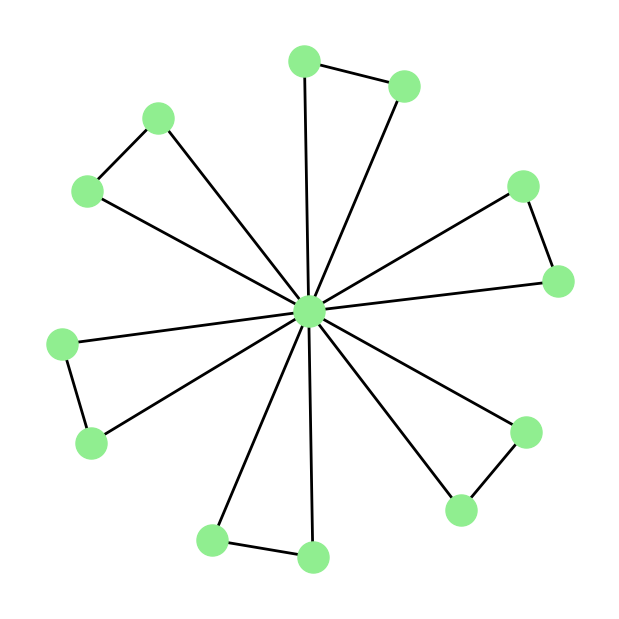

Transitivity of the graph: 0.23076923076923078
Average Clustering Coefficient of the graph: 0.9300699300699301


In [ ]:
G_star_modified = nx.Graph()
G_star_modified.add_node(0)  
for i in range(1, 13):
    G_star_modified.add_edge(0, i)

G_star_modified.add_edge(1, 2)
G_star_modified.add_edge(3, 4)
G_star_modified.add_edge(5, 6)
G_star_modified.add_edge(7, 8)
G_star_modified.add_edge(9, 10)
G_star_modified.add_edge(11, 12)

pos = nx.spring_layout(G_star_modified, seed=42)  
plt.figure(figsize=(6, 6))
nx.draw(G_star_modified, pos, with_labels=False, node_color='lightgreen', node_size=500, edge_color='black', width=2)
plt.show()

transitivity = nx.transitivity(G_star_modified)
print("Transitivity of the graph:", transitivity)

avg_clustering_coeff = nx.average_clustering(G_star_modified)
print("Average Clustering Coefficient of the graph:", avg_clustering_coeff)




- Most nodes have high **Local Clustering Coefficient (LCC)**.
- The high-degree node has low **LCC**.

$$
\text{Average Clustering Coefficient} = 0.93
$$

$$
\text{Transitivity} = 0.23
$$



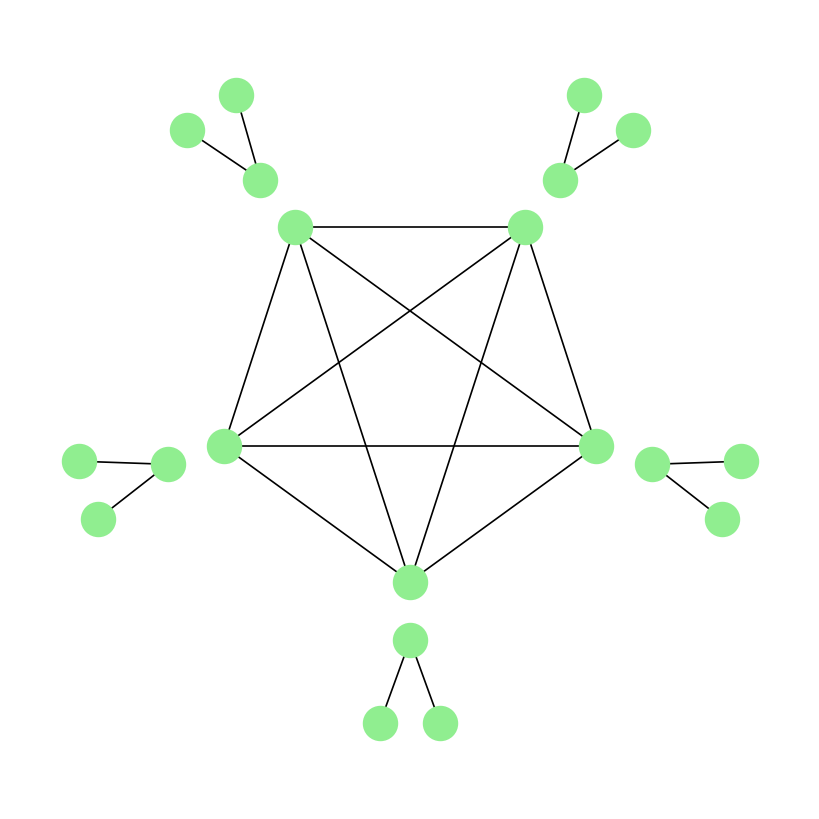

Transitivity: 0.8571428571428571
Average Clustering Coefficient: 0.25


In [9]:
G = nx.Graph()

central_nodes = range(5)
G.add_nodes_from(central_nodes)

for i in central_nodes:
    for j in central_nodes:
        if i < j:
            G.add_edge(i, j)

peripheral_offset = 5
for i in range(5):
    peripheral_1 = peripheral_offset + 3 * i
    peripheral_2 = peripheral_offset + 3 * i + 1
    peripheral_3 = peripheral_offset + 3 * i + 2

    G.add_edge(peripheral_1, peripheral_2)
    G.add_edge(peripheral_3, peripheral_2)

angle_step = 2 * np.pi / 5
pentagon_radius = 1.0
arrow_offset_radius = 0.5
arrow_distance = 1.2  
pos = {}

for i in range(5):
    angle = i * angle_step - np.pi / 2
    center_x = pentagon_radius * np.cos(angle)
    center_y = pentagon_radius * np.sin(angle)

    pos[i] = (center_x, center_y)

    arrow_center_x = center_x + arrow_distance * np.cos(angle)
    arrow_center_y = center_y + arrow_distance * np.sin(angle)

    middle_node = peripheral_offset + 3 * i + 1  
    left_node = peripheral_offset + 3 * i
    right_node = peripheral_offset + 3 * i + 2

    pointer_distance = 1.3 
    pos[middle_node] = (pointer_distance * np.cos(angle), pointer_distance * np.sin(angle))

    angle_offset = np.pi / 10
    pos[left_node] = (arrow_center_x - arrow_offset_radius * np.cos(angle + angle_offset),
                      arrow_center_y - arrow_offset_radius * np.sin(angle + angle_offset))
    pos[right_node] = (arrow_center_x - arrow_offset_radius * np.cos(angle - angle_offset),
                       arrow_center_y - arrow_offset_radius * np.sin(angle - angle_offset))

plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=False, node_color='lightgreen', node_size=600, edge_color='black', width=1.2)

plt.axis('equal')  
plt.axis('off')
#plt.tight_layout()
plt.show()

transitivity = nx.transitivity(G)
avg_clustering = nx.average_clustering(G)

print(f"Transitivity: {transitivity}")
print(f"Average Clustering Coefficient: {avg_clustering}")

- Most nodes have low **Local Clustering Coefficient (LCC)**.
- The high-degree node has high **LCC**.

$$
\text{Average Clustering Coefficient} = 0.25
$$

$$
\text{Transitivity} = 0.86
$$

---

### Key Differences

- **Transitivity** emphasizes the presence of triangles and places more weight on nodes with high degrees.
- **Average Clustering Coefficient (ACC)** takes an average over all nodes but can overlook the influence of high-degree nodes.


# Distance measures


## a way to define a graph 

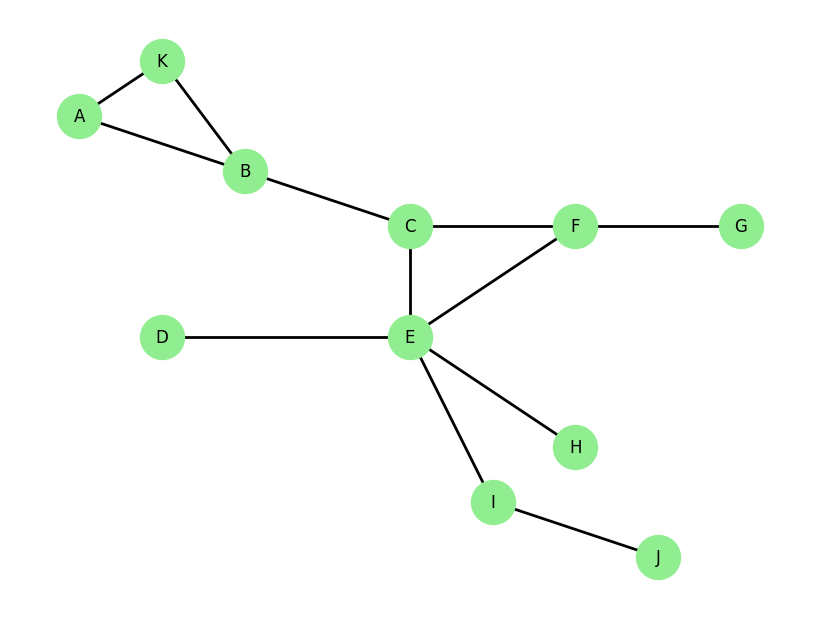

In [12]:

G = nx.Graph()

nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
G.add_nodes_from(nodes)

edges = [
    ('A', 'B'), ('A', 'K'), ('B', 'C'), ('B', 'K'), ('C', 'E'),
    ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ('I', 'E'),
    ('I', 'J'), ('F', 'G')
]
G.add_edges_from(edges)

pos = {
    'A': (0, 2), 'B': (1, 1.5), 'C': (2, 1), 'D': (0.5, 0),
    'E': (2, 0), 'F': (3, 1), 'G': (4, 1), 'H': (3, -1),
    'I': (2.5, -1.5), 'J': (3.5, -2), 'K': (0.5, 2.5)
}

plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=12, edge_color='black', width=2)

plt.show()

### 1. Path Length

![Graph showing distances between nodes](AH.png)


Path length refers to the number of steps (or hops) it takes to travel from one node to another. In this graph, there are two possible paths from node **A** to node **H**:

1. **Path 1**: A → B → C → E → H (4 "hops")
2. **Path 2**: A → B → C → F → E → H (5 "hops")


Path length is a fundamental concept in network analysis, representing the distance between any two points.

![Graph showing distances between nodes](A_H.png)


### 2. Average Path Length
- **Definition**: The average path length is the average of the shortest path distances between all pairs of nodes in the graph.
- **Formula**: 
  $$
  \text{Average Path Length} = \frac{1}{N(N-1)} \sum_{u \neq v} d(u, v)
  $$
  where  **N**  is the number of nodes, and  **d(u, v)**  is the shortest path distance between nodes  **u**  and  **v** .



In [14]:
shortest_path_A_H = nx.shortest_path(G, 'A', 'H')
shortest_path_length_A_H = nx.shortest_path_length(G, 'A', 'H')

avg_shortest_path_length = nx.average_shortest_path_length(G)

print("Shortest path between A and H:", shortest_path_A_H)
print("Shortest path length between A and H:", shortest_path_length_A_H)
print("Average shortest path length:", avg_shortest_path_length)


Shortest path between A and H: ['A', 'B', 'C', 'E', 'H']
Shortest path length between A and H: 4
Average shortest path length: 2.5272727272727273



### 3. Diameter

The diameter is the maximum distance between any pair of nodes in the graph. Here, the longest path between any two nodes is between nodes **k** and **J** or nodes **A** and **J** , passing through several intermediate nodes. 


![Graph showing distances between nodes](dia.png)

In [ ]:
nx.diameter(G)

### 4. Eccentricity
- **Definition**: The eccentricity of a node is the greatest shortest path distance from that node to any other node in the graph.
- **Formula**: 
  $$
  e(v) = \max \{d(v, u) \mid u \in V(G)\}
  $$
  where **d(v, u)**  is the shortest path distance between  **v**  and  **u** .




In [ ]:
nx.eccentricity(G)


  ### 5. Radius
- **Definition**: The radius of a graph is the minimum eccentricity of any node in the graph.
- **Formula**: 
  $$
  \text{Radius} = \min_{v \in V(G)} e(v)
  $$
  where  **e (v)** is the eccentricity of node **v**.



In [ ]:
nx.radius(G)


### 6. periphery
Is the set of nodes that have eccentricity equal to the diameter.

![](A_J_K.png)


In [ ]:
nx.periphery(G)

### 7. Center
Is the set of nodes that have eccentricity equal to the radius.


![Graph showing distances between nodes](F_E_C.png)



In [ ]:
nx.center(G)

### Karate club

Number of nodes: 34
Number of edges: 78


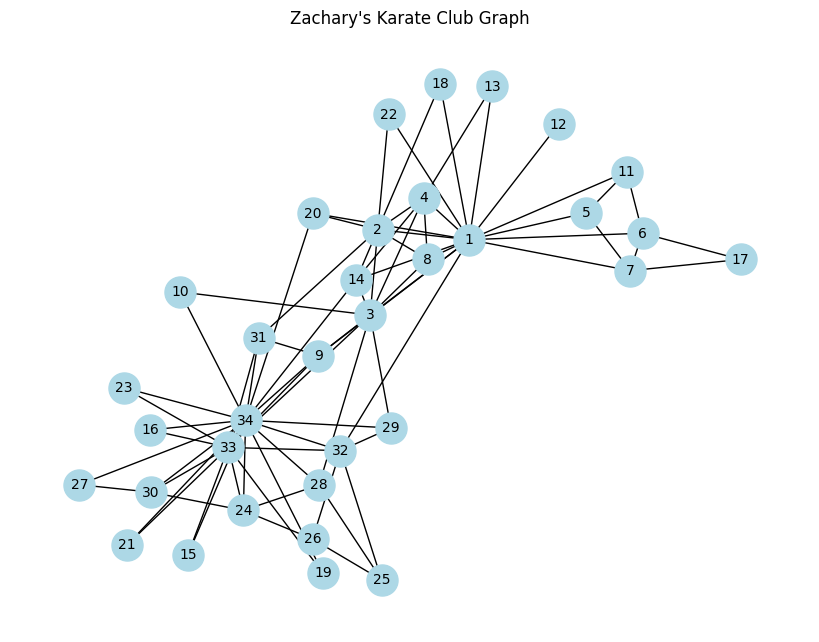

In [15]:
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G,first_label=1)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Zachary's Karate Club Graph")
plt.show()


draw the karate club in circular form

compute average shortest path, and show the shortest path between node 1 to 34

compute radius, diameter , center, eccentricity, center, periphery

### Connected Graph 

A connected graph is a graph in which there is a path between every pair of vertices. In the example below, you can see that every node is reachable from any other node, meaning the graph is fully connected.



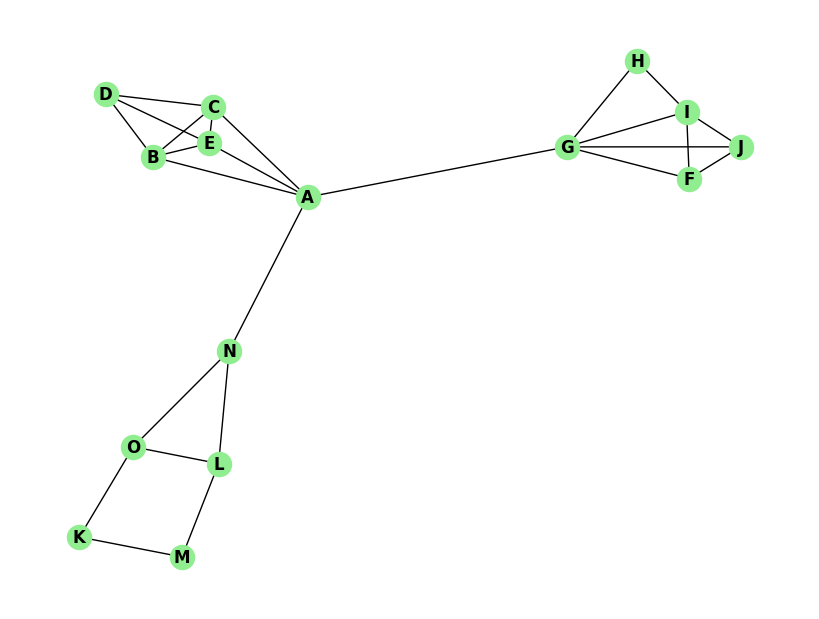

In [145]:

G = nx.Graph()

edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'G'), ('A', 'N'),  \
    ('B', 'C'), ('B', 'E'),('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'), 
    ('F', 'J'),('F', 'I'),  ('I', 'J'),('I', 'H'),
    ('N', 'L'), ('N', 'O'), 
    ('M', 'L'), ('M', 'K'), ('O', 'K'),('O', 'L')
]

G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G,seed=50)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', font_weight='bold',  font_size=12, edge_color='black')
plt.show()


In [49]:
nx.is_connected(G)

True

### Graph component
The number of components tells us how many separate subgraphs exist in the graph.

let's see how we can find the components in this graph.




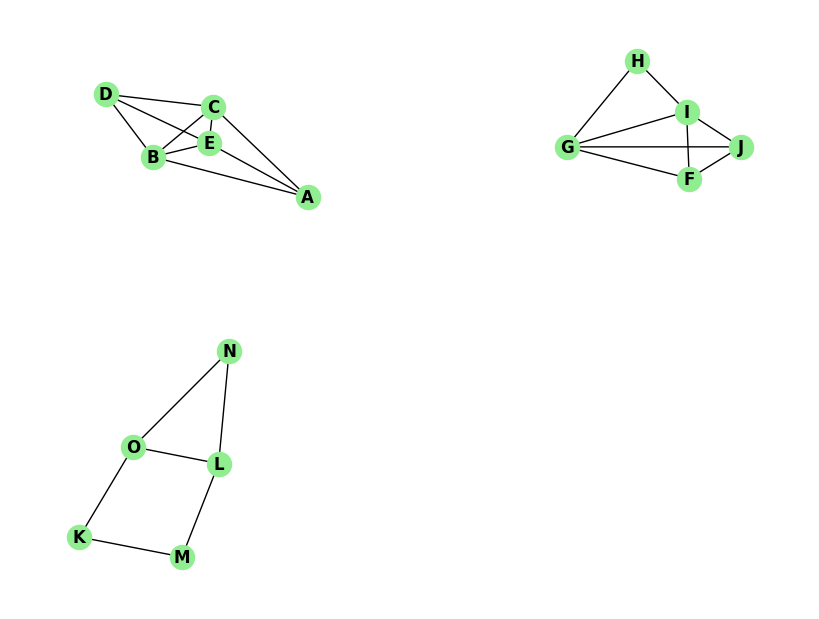

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), # Removed ('A', 'G') and ('A', 'N')
    ('B', 'C'), ('B', 'E'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'),
    ('F', 'J'), ('F', 'I'), ('I', 'J'), ('I', 'H'),
    ('N', 'L'), ('N', 'O'),
    ('M', 'L'), ('M', 'K'), ('O', 'K'), ('O', 'L')
]

G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
full_G = nx.Graph()
full_edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'G'), ('A', 'N'),
    ('B', 'C'), ('B', 'E'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'),
    ('F', 'J'), ('F', 'I'), ('I', 'J'), ('I', 'H'),
    ('N', 'L'), ('N', 'O'),
    ('M', 'L'), ('M', 'K'), ('O', 'K'), ('O', 'L')
]
full_G.add_edges_from(full_edges)

pos = nx.spring_layout(full_G, seed=50)

nx.draw(G, pos, with_labels=True, node_color='lightgreen', font_weight='bold', font_size=12, edge_color='black')
plt.savefig('component_modified.png')
plt.show()

In [51]:
nx.number_connected_components(G)


3

In [15]:
sorted(nx.connected_components(G))


[{'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'H', 'I', 'J'},
 {'K', 'L', 'M', 'N', 'O'}]

In [22]:
nx.node_connected_component(G,'M')

{'K', 'L', 'M', 'N', 'O'}

### Directed Graph Connectivity


1. **Weakly Connected Components**:
    - A directed graph is weakly connected if replacing all directed edges with undirected edges results in a connected graph.
    - This means that there may not be directed paths between nodes, but if the directions are ignored, all nodes are still reachable from each other.
    - In essence, weak connectivity only cares if the nodes are connected, but not about the direction of the connections.



2. **Strongly Connected Components**:
    - A directed graph is strongly connected if, for every pair of nodes **u**  and  **v** , there is a directed path from  **u**  to  **v**  and also a directed path from **v** to  **u** .
    - Strongly connected components (SCCs) are maximal subgraphs where each vertex is reachable from every other vertex by following directed edges.
    - In other words, within each strongly connected component, all nodes can reach each other while respecting the direction of the edges.



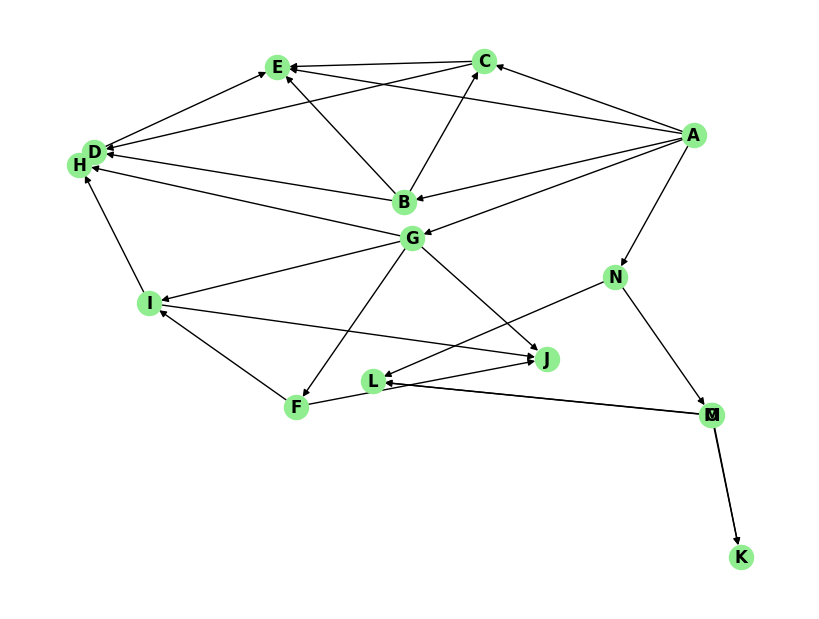

In [136]:
DG = nx.DiGraph()

edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'G'), ('A', 'N'), 
    ('B', 'C'), ('B', 'E'),('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'), 
    ('F', 'J'),('F', 'I'),  ('I', 'J'),('I', 'H'),
    ('N', 'L'), ('N', 'O'),
    ('M', 'L'), ('M', 'K'), ('O', 'K'),('O', 'L')
]

DG.add_edges_from(edges)
plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(DG) 
nx.draw(DG, pos, with_labels=True, node_color='lightgreen', font_weight='bold',  font_size=12, edge_color='black')
plt.savefig('DG.png')
plt.show()



In [137]:
nx.is_strongly_connected(DG)

False

In [138]:
nx.is_weakly_connected(DG)

True

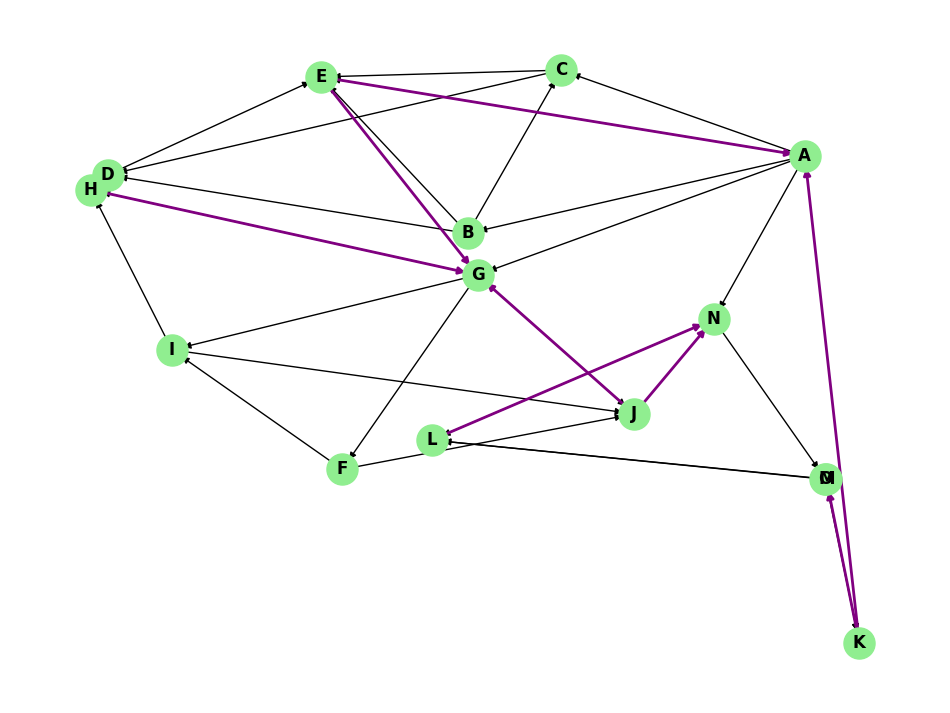

In [140]:
DG = nx.DiGraph()

edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'G'), ('A', 'N'), 
    ('B', 'C'), ('B', 'E'),('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'), 
    ('F', 'J'),('F', 'I'),  ('I', 'J'),('I', 'H'),
    ('N', 'L'), ('N', 'O'),
    ('M', 'L'), ('M', 'K'), ('O', 'K'),('O', 'L')
]

new_edges = [
    ('E', 'A'), 
    ('J', 'G'),
    ('H', 'G'), 
    ('K', 'M'),  
    ('L', 'N'),  
    ('E', 'G'),  
    ('J', 'N'),  
    ('K', 'A')   
]

DG.add_edges_from(edges)
DGS = nx.DiGraph()
DGS.add_edges_from(edges)
DGS.add_edges_from(new_edges)


pos = nx.kamada_kawai_layout(DG)

plt.figure(figsize=(12, 9))
nx.draw_networkx_nodes(DGS, pos, node_color='lightgreen', node_size=500)
nx.draw_networkx_labels(DGS, pos, font_weight='bold', font_size=12)

original_edges = [e for e in DGS.edges() if e in edges]
added_edges = [e for e in DGS.edges() if e in new_edges]

nx.draw_networkx_edges(DGS, pos, edgelist=original_edges, edge_color='black', arrows=True)
nx.draw_networkx_edges(DGS, pos, edgelist=added_edges, edge_color='purple', arrows=True, width=2)

plt.axis('off')
plt.show()

In [141]:
print("Is the graph strongly connected now?", nx.is_strongly_connected(DGS))


Is the graph strongly connected now? True


In [142]:
nx.is_weakly_connected(DGS)

True

# Network Robustness

Network robustness refers to the resilience of a network to failures or attacks. Robustness measures how well a network maintains its overall structure and functionality when nodes or edges are removed. The following concepts are critical in analyzing the robustness of a network:


## Simple Paths

In graph theory, a **simple path** is a path that does not repeat any nodes. A path is simply a sequence of edges that connect a series of nodes. In a simple path:
- Each node is visited exactly once (no cycles).
- The start and end nodes can be different or the same (if the path returns to the starting node, it's called a **cycle**).

Simple paths are crucial in understanding how information, resources, or people travel through a network. They also help in solving problems like finding the shortest route between two nodes or determining if two nodes are connected.


All simple paths from 0 to 6: [[0, 2, 1, 4, 6], [0, 2, 1, 4, 7, 6], [0, 2, 1, 4, 7, 8, 6], [0, 2, 1, 4, 8, 6], [0, 2, 1, 4, 8, 7, 6], [0, 2, 1, 4, 9, 7, 6], [0, 2, 1, 4, 9, 7, 8, 6], [0, 2, 1, 4, 9, 8, 6], [0, 2, 1, 4, 9, 8, 7, 6], [0, 2, 1, 5, 7, 4, 6], [0, 2, 1, 5, 7, 4, 8, 6], [0, 2, 1, 5, 7, 4, 9, 8, 6], [0, 2, 1, 5, 7, 6], [0, 2, 1, 5, 7, 8, 6], [0, 2, 1, 5, 8, 6], [0, 2, 1, 5, 8, 7, 4, 6], [0, 2, 1, 5, 8, 7, 6], [0, 2, 1, 8, 6], [0, 2, 1, 8, 7, 4, 6], [0, 2, 1, 8, 7, 6], [0, 2, 6], [0, 2, 9, 4, 6], [0, 2, 9, 4, 7, 6], [0, 2, 9, 4, 7, 8, 6], [0, 2, 9, 4, 8, 6], [0, 2, 9, 4, 8, 7, 6], [0, 2, 9, 7, 4, 6], [0, 2, 9, 7, 4, 8, 6], [0, 2, 9, 7, 6], [0, 2, 9, 7, 8, 6], [0, 2, 9, 8, 6], [0, 2, 9, 8, 7, 4, 6], [0, 2, 9, 8, 7, 6], [0, 4, 6], [0, 4, 7, 6], [0, 4, 7, 8, 6], [0, 4, 8, 6], [0, 4, 8, 7, 6], [0, 4, 9, 7, 6], [0, 4, 9, 7, 8, 6], [0, 4, 9, 8, 6], [0, 4, 9, 8, 7, 6], [0, 8, 6], [0, 8, 7, 4, 6], [0, 8, 7, 6]]


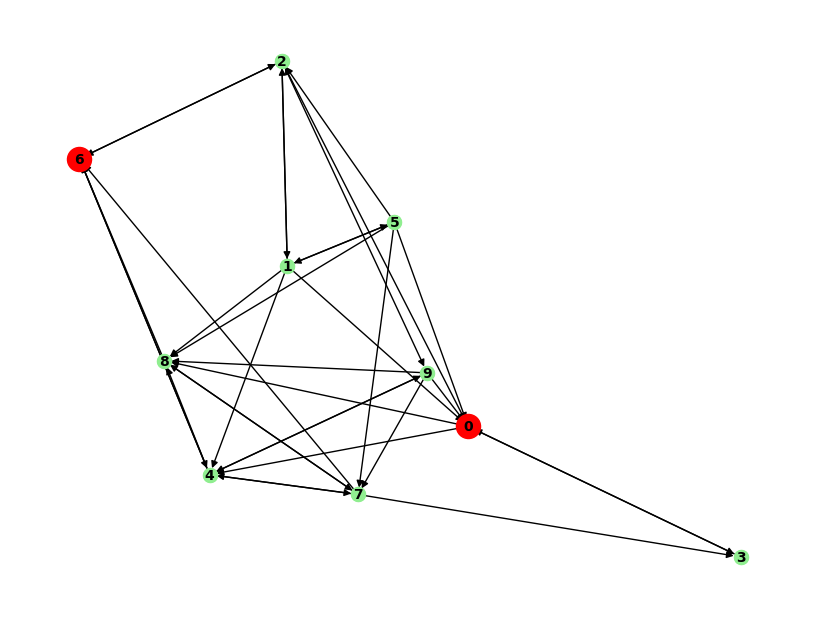

In [ ]:

n = 10
p = 0.3  
G = nx.erdos_renyi_graph(n, p, directed=True,seed=42)  

pos = nx.spring_layout(G,seed=50)  

plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=100, font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=100)

source_node = 0
target_node = 6
nx.draw_networkx_nodes(G, pos, nodelist=[source_node, target_node], node_color='red')  

simple_paths = list(nx.all_simple_paths(G, source=source_node, target=target_node))
print(f"All simple paths from {source_node} to {target_node}: {simple_paths}")


plt.show()



All simple paths from 0 to 6: [[0, 2, 1, 4, 6], [0, 2, 1, 4, 7, 6], [0, 2, 1, 4, 7, 8, 6], [0, 2, 1, 4, 8, 6], [0, 2, 1, 4, 8, 7, 6], [0, 2, 1, 4, 9, 7, 6], [0, 2, 1, 4, 9, 7, 8, 6], [0, 2, 1, 4, 9, 8, 6], [0, 2, 1, 4, 9, 8, 7, 6], [0, 2, 1, 5, 7, 4, 6], [0, 2, 1, 5, 7, 4, 8, 6], [0, 2, 1, 5, 7, 4, 9, 8, 6], [0, 2, 1, 5, 7, 6], [0, 2, 1, 5, 7, 8, 6], [0, 2, 1, 5, 8, 6], [0, 2, 1, 5, 8, 7, 4, 6], [0, 2, 1, 5, 8, 7, 6], [0, 2, 1, 8, 6], [0, 2, 1, 8, 7, 4, 6], [0, 2, 1, 8, 7, 6], [0, 2, 6], [0, 2, 9, 4, 6], [0, 2, 9, 4, 7, 6], [0, 2, 9, 4, 7, 8, 6], [0, 2, 9, 4, 8, 6], [0, 2, 9, 4, 8, 7, 6], [0, 2, 9, 7, 4, 6], [0, 2, 9, 7, 4, 8, 6], [0, 2, 9, 7, 6], [0, 2, 9, 7, 8, 6], [0, 2, 9, 8, 6], [0, 2, 9, 8, 7, 4, 6], [0, 2, 9, 8, 7, 6], [0, 4, 6], [0, 4, 7, 6], [0, 4, 7, 8, 6], [0, 4, 8, 6], [0, 4, 8, 7, 6], [0, 4, 9, 7, 6], [0, 4, 9, 7, 8, 6], [0, 4, 9, 8, 6], [0, 4, 9, 8, 7, 6], [0, 8, 6], [0, 8, 7, 4, 6], [0, 8, 7, 6]]


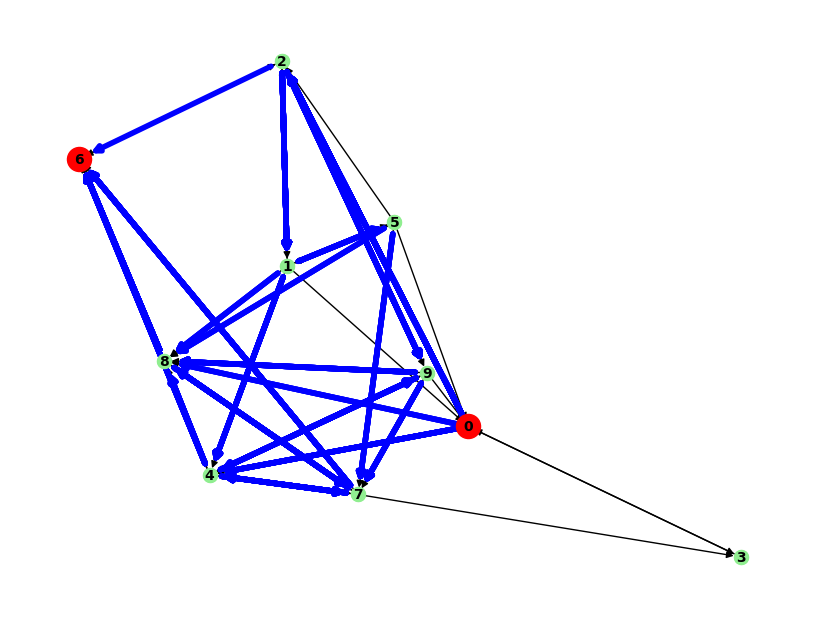

In [ ]:

n = 10
p = 0.3  
G = nx.erdos_renyi_graph(n, p, directed=True,seed=42)  

pos = nx.spring_layout(G,seed=50)  

plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=100, font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=100)

source_node = 0
target_node = 6
nx.draw_networkx_nodes(G, pos, nodelist=[source_node, target_node], node_color='red')  

simple_paths = list(nx.all_simple_paths(G, source=source_node, target=target_node))
print(f"All simple paths from {source_node} to {target_node}: {simple_paths}")

for path in simple_paths:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=4)

plt.show()



### Disconnecting a graph

what is the smallest number of nodes that can be removed from below graph in order to make it dissconnected?


1. **Node Connectivity**:
    - The minimum number of nodes that must be removed to disconnect the remaining network.
    - High node connectivity indicates greater resilience to node failures.





Minimum node cut between 0 and 6: {8, 2, 4}
All simple paths from 0 to 6: [[0, 2, 1, 4, 6], [0, 2, 1, 4, 7, 6], [0, 2, 1, 4, 7, 8, 6], [0, 2, 1, 4, 8, 6], [0, 2, 1, 4, 8, 7, 6], [0, 2, 1, 4, 9, 7, 6], [0, 2, 1, 4, 9, 7, 8, 6], [0, 2, 1, 4, 9, 8, 6], [0, 2, 1, 4, 9, 8, 7, 6], [0, 2, 1, 5, 7, 4, 6], [0, 2, 1, 5, 7, 4, 8, 6], [0, 2, 1, 5, 7, 4, 9, 8, 6], [0, 2, 1, 5, 7, 6], [0, 2, 1, 5, 7, 8, 6], [0, 2, 1, 5, 8, 6], [0, 2, 1, 5, 8, 7, 4, 6], [0, 2, 1, 5, 8, 7, 6], [0, 2, 1, 8, 6], [0, 2, 1, 8, 7, 4, 6], [0, 2, 1, 8, 7, 6], [0, 2, 6], [0, 2, 9, 4, 6], [0, 2, 9, 4, 7, 6], [0, 2, 9, 4, 7, 8, 6], [0, 2, 9, 4, 8, 6], [0, 2, 9, 4, 8, 7, 6], [0, 2, 9, 7, 4, 6], [0, 2, 9, 7, 4, 8, 6], [0, 2, 9, 7, 6], [0, 2, 9, 7, 8, 6], [0, 2, 9, 8, 6], [0, 2, 9, 8, 7, 4, 6], [0, 2, 9, 8, 7, 6], [0, 4, 6], [0, 4, 7, 6], [0, 4, 7, 8, 6], [0, 4, 8, 6], [0, 4, 8, 7, 6], [0, 4, 9, 7, 6], [0, 4, 9, 7, 8, 6], [0, 4, 9, 8, 6], [0, 4, 9, 8, 7, 6], [0, 8, 6], [0, 8, 7, 4, 6], [0, 8, 7, 6]]


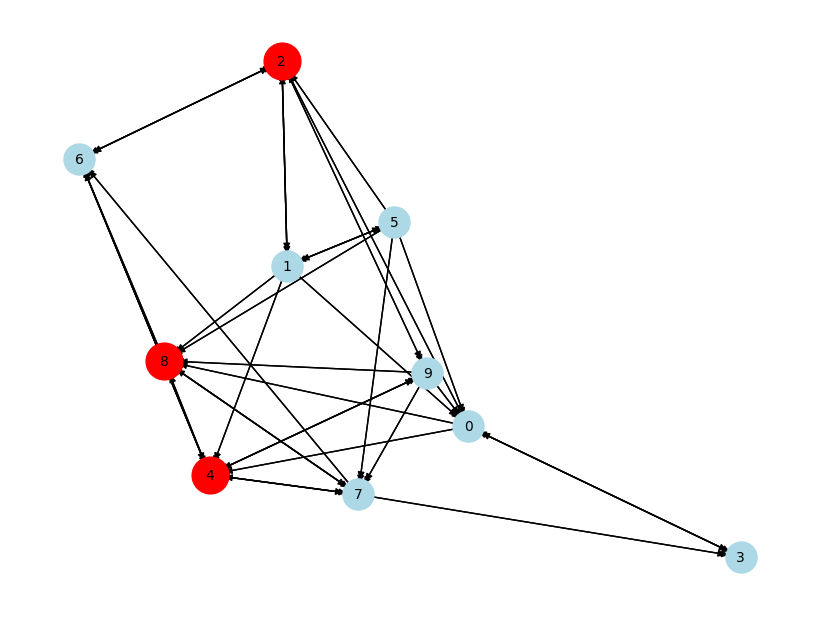

In [120]:
n = 10
p = 0.3 
G = nx.erdos_renyi_graph(n, p, seed=42, directed=True)

source = 0
target = 6

min_node_cut = nx.minimum_node_cut(G, source, target)
print(f"Minimum node cut between {source} and {target}: {min_node_cut}")

all_paths = list(nx.all_simple_paths(G, source=source, target=target))
print(f"All simple paths from {source} to {target}: {all_paths}")

pos = nx.spring_layout(G,seed=50)
plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

nx.draw_networkx_nodes(G, pos, nodelist=min_node_cut, node_color='red', node_size=700)

plt.savefig('NC1.png')

plt.show()




what is the smallest number of *edges* that can be removed from below graph in order to make it dissconnected?

2. **Edge Connectivity**:
    - The minimum number of edges that must be removed to disconnect the network.
    - High edge connectivity indicates resilience to link (or edge) failures.



In a robust network, node or edge failures will have minimal impact on the overall connectivity of the network.


Minimum node cut between 0 and 6: {8, 2, 4}
Minimum edge cut between 0 and 6: {(0, 2), (0, 4), (0, 8)}
All simple paths from 0 to 6: [[0, 2, 1, 4, 6], [0, 2, 1, 4, 7, 6], [0, 2, 1, 4, 7, 8, 6], [0, 2, 1, 4, 8, 6], [0, 2, 1, 4, 8, 7, 6], [0, 2, 1, 4, 9, 7, 6], [0, 2, 1, 4, 9, 7, 8, 6], [0, 2, 1, 4, 9, 8, 6], [0, 2, 1, 4, 9, 8, 7, 6], [0, 2, 1, 5, 7, 4, 6], [0, 2, 1, 5, 7, 4, 8, 6], [0, 2, 1, 5, 7, 4, 9, 8, 6], [0, 2, 1, 5, 7, 6], [0, 2, 1, 5, 7, 8, 6], [0, 2, 1, 5, 8, 6], [0, 2, 1, 5, 8, 7, 4, 6], [0, 2, 1, 5, 8, 7, 6], [0, 2, 1, 8, 6], [0, 2, 1, 8, 7, 4, 6], [0, 2, 1, 8, 7, 6], [0, 2, 6], [0, 2, 9, 4, 6], [0, 2, 9, 4, 7, 6], [0, 2, 9, 4, 7, 8, 6], [0, 2, 9, 4, 8, 6], [0, 2, 9, 4, 8, 7, 6], [0, 2, 9, 7, 4, 6], [0, 2, 9, 7, 4, 8, 6], [0, 2, 9, 7, 6], [0, 2, 9, 7, 8, 6], [0, 2, 9, 8, 6], [0, 2, 9, 8, 7, 4, 6], [0, 2, 9, 8, 7, 6], [0, 4, 6], [0, 4, 7, 6], [0, 4, 7, 8, 6], [0, 4, 8, 6], [0, 4, 8, 7, 6], [0, 4, 9, 7, 6], [0, 4, 9, 7, 8, 6], [0, 4, 9, 8, 6], [0, 4, 9, 8, 7, 6], [0, 8, 6], [0,

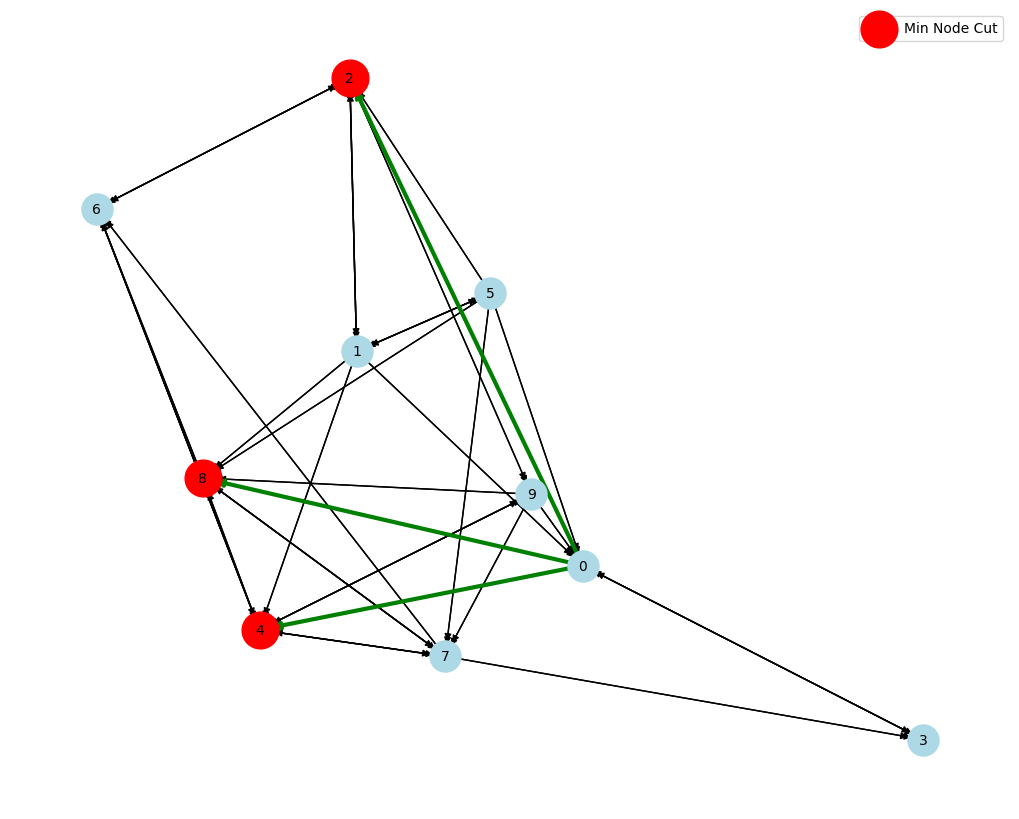

In [124]:
n = 10
p = 0.3 
G = nx.erdos_renyi_graph(n, p, seed=42, directed=True)

source = 0
target = 6

min_node_cut = nx.minimum_node_cut(G, source, target)
print(f"Minimum node cut between {source} and {target}: {min_node_cut}")

min_edge_cut = nx.minimum_edge_cut(G, source, target)
print(f"Minimum edge cut between {source} and {target}: {min_edge_cut}")

all_paths = list(nx.all_simple_paths(G, source=source, target=target))
print(f"All simple paths from {source} to {target}: {all_paths}")

pos = nx.spring_layout(G,seed=50)
plt.figure(figsize=(10, 8))

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

nx.draw_networkx_nodes(G, pos, nodelist=min_node_cut, node_color='red', node_size=700, label="Min Node Cut")

nx.draw_networkx_edges(G, pos, edgelist=min_edge_cut, edge_color='green', width=3, label="Min Edge Cut")

plt.legend(loc="upper right")
plt.savefig('EC1.png')

plt.show()


### Thank you for your attention!
